In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold


c:\Users\jeffr\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv("c:/sri_lab/regression_df.csv")

data

,Unnamed: 0,p_value,Fp2,F3,T8,CP3,Fp1_var,Fp2_var,F7_var,F3_var,FCz_var,FC4_var,CPz_var,Pz_var,P4_var,index_variance,age,gender,label
0,sub-88015117_ses-1_task-restEC,0.012551,1.369391,0.636859,0.971955,0.746474,0.054869,0.075317,0.101321,0.102855,0.034019,0.078454,0.118916,0.092646,0.068244,0.080738,38.00,F,1
1,sub-88015117_ses-1_task-restEO,0.007027,1.084455,0.561859,1.100962,1.686378,0.068695,0.072472,0.055857,0.076289,0.023040,0.072904,0.065606,0.003191,0.027462,0.051724,38.00,F,1
2,sub-88015117_ses-3_task-restEC,0.027186,1.009615,0.835737,1.644071,0.895032,0.080320,0.095211,0.053812,0.081826,0.080556,0.090455,0.078618,0.069226,0.066068,0.077344,38.00,F,1
3,sub-88015117_ses-3_task-restEO,0.006760,0.788782,0.956731,0.491667,1.280929,0.062688,0.072584,0.069990,0.058840,0.030254,0.049909,0.063727,0.052042,0.043557,0.055954,38.00,F,1
4,sub-88015565_ses-1_task-restEC,0.014994,0.736218,0.665705,0.818910,1.262660,0.184954,0.114282,0.162473,0.113999,0.156694,0.146741,0.163526,0.130978,0.234044,0.156410,47.31,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,sub-88068841_ses-1_task-restEO,0.163788,1.111874,1.045643,0.544526,1.434408,0.087589,0.079575,0.078457,0.068603,0.055844,0.003975,0.073917,0.088411,0.081409,0.068642,52.30,M,0
252,sub-88073029_ses-1_task-restEC,0.079700,0.908235,1.126396,0.784871,0.922119,0.128196,0.161698,0.096806,0.147077,0.136091,0.137627,0.125782,0.169491,0.121217,0.135998,28.67,F,0
253,sub-88073029_ses-1_task-restEO,0.103158,1.474146,0.838015,1.185445,0.896904,0.115655,0.127447,0.108162,0.132597,0.136076,0.113821,0.157956,0.129898,0.127280,0.127655,28.67,F,0
254,sub-88075053_ses-1_task-restEC,0.211260,1.287584,1.697415,0.954836,0.761411,0.070274,0.067287,0.083504,0.065750,0.069766,0.061711,0.063630,0.046448,0.073577,0.066883,45.52,F,0


In [4]:
#defining feature columns
feature_cols = ['p_value','Fp2', 'CP3','P4_var']

X = data[feature_cols]
y = data.label

#split x and y into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.describe())

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


          p_value         Fp2         CP3      P4_var
count  204.000000  204.000000  204.000000  204.000000
mean     0.071797    0.960561    1.259683    0.097397
std      0.091054    0.266304    0.343806    0.044984
min      0.000009    0.301603    0.457868    0.001876
25%      0.008865    0.785657    0.990784    0.071913
50%      0.029572    0.946427    1.278926    0.103565
75%      0.104315    1.139343    1.492535    0.130895
max      0.514876    1.864423    1.969039    0.234044


In [5]:
logreg = LogisticRegression(C=100, solver='liblinear', random_state=10, penalty='l1')

# fit the model with data
logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)

#evaluate performance
print('Model accuracy score: {0:0.4f}'. format(metrics.accuracy_score(y_test, y_pred_test)))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
print(cnf_matrix)

#check for overfitting

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Model accuracy score: 0.8654
[[16  6]
 [ 1 29]]
Training set score: 0.9118
Test set score: 0.8654


beta_0: [0.15895374]
beta_1: [[-48.81923468   0.7656373    0.98993778  13.82592786]]
[[ 9  0]
 [ 1 16]]
Fold score: 0.9615
sensitivity: 0.9411764705882353
specificity: 1.0
Best Threshold=1.000000, G-Mean=0.970
beta_0: [0.56601084]
beta_1: [[-54.38956865   1.5810198    0.74220537   9.02986686]]
[[ 5  4]
 [ 1 16]]
Fold score: 0.8077
sensitivity: 0.9411764705882353
specificity: 0.5555555555555556
Best Threshold=1.000000, G-Mean=0.723
beta_0: [-0.46387945]
beta_1: [[-48.25853594   1.48187535   1.33965586   9.97054807]]
[[ 8  2]
 [ 0 16]]
Fold score: 0.9231
sensitivity: 1.0
specificity: 0.8
Best Threshold=1.000000, G-Mean=0.894
beta_0: [0.]
beta_1: [[-48.68824145   1.55154272   0.85682521  10.19231383]]
[[ 8  2]
 [ 0 16]]
Fold score: 0.9231
sensitivity: 1.0
specificity: 0.8
Best Threshold=1.000000, G-Mean=0.894
beta_0: [0.48991519]
beta_1: [[-47.6173514    1.14055399   0.65774558  11.7230437 ]]
[[ 8  2]
 [ 0 16]]
Fold score: 0.9231
sensitivity: 1.0
specificity: 0.8
Best Threshold=1.000000, 

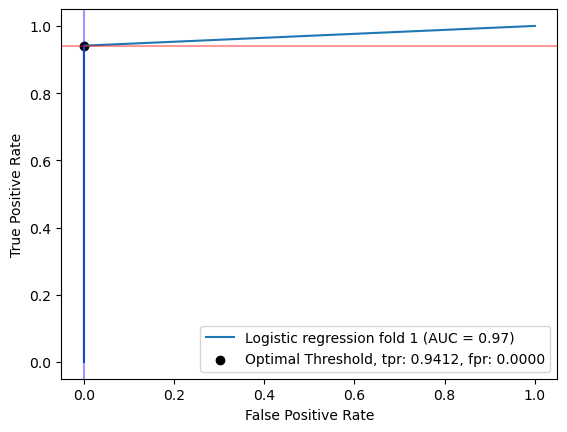

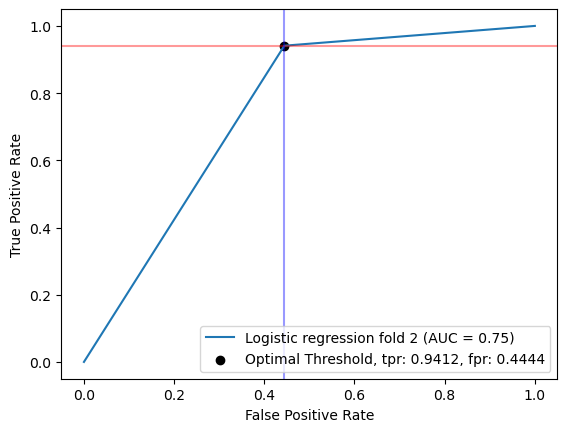

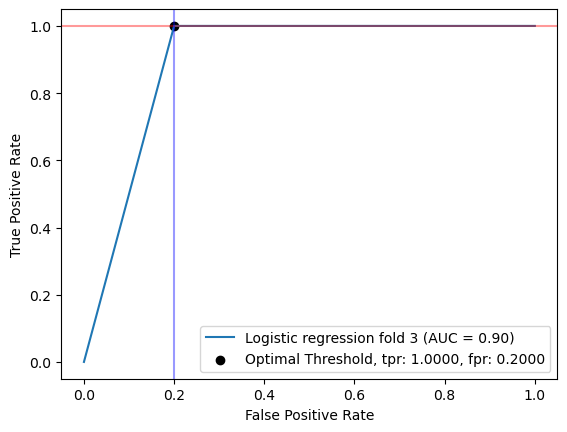

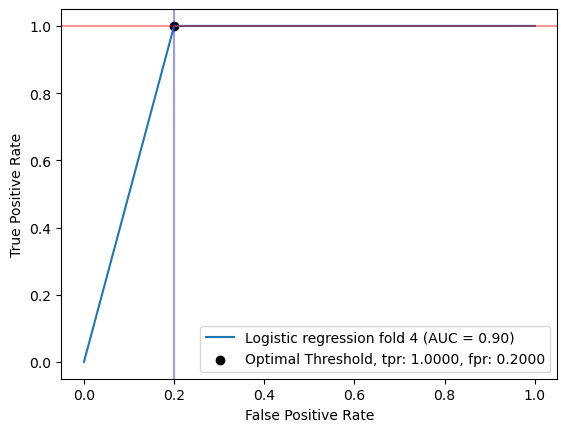

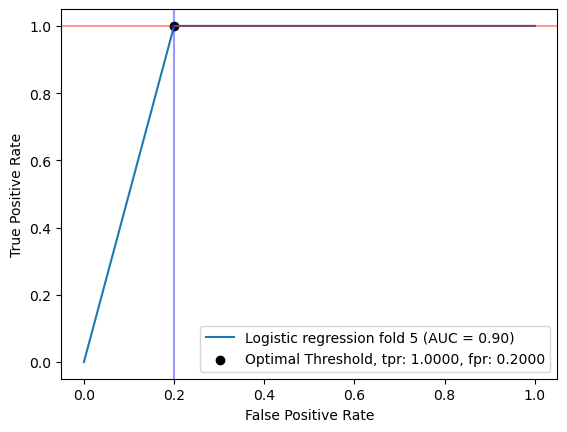

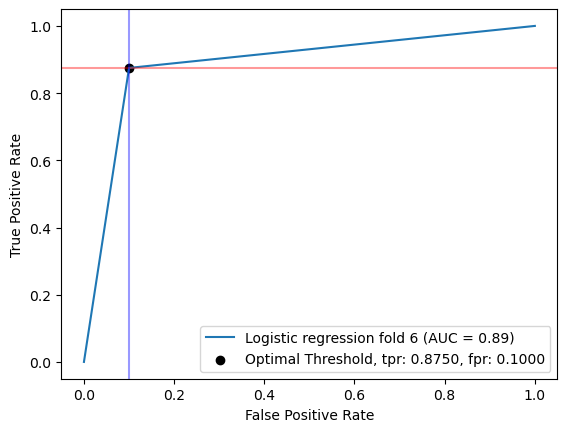

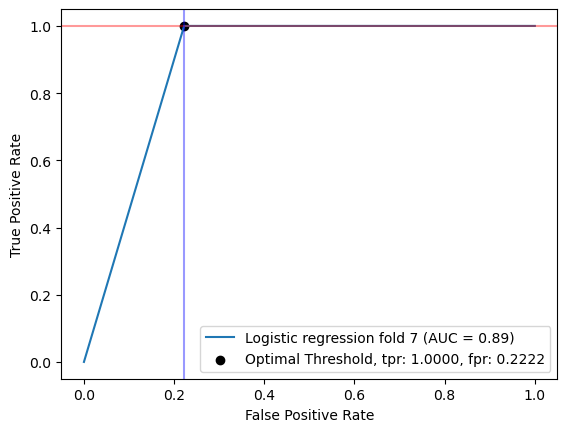

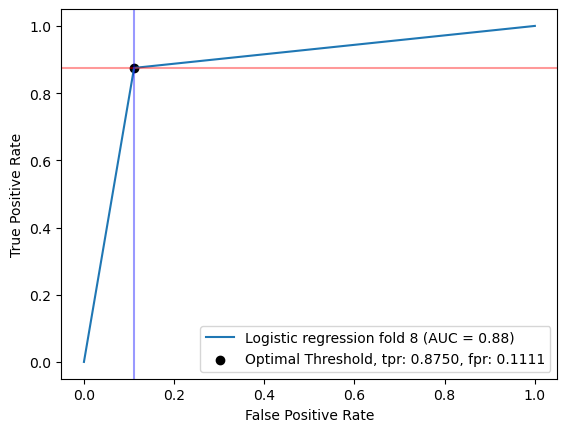

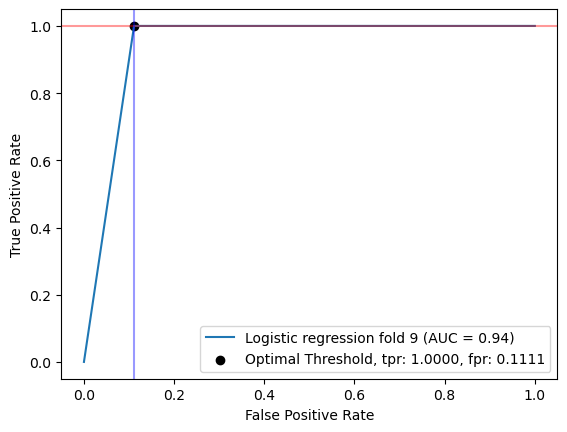

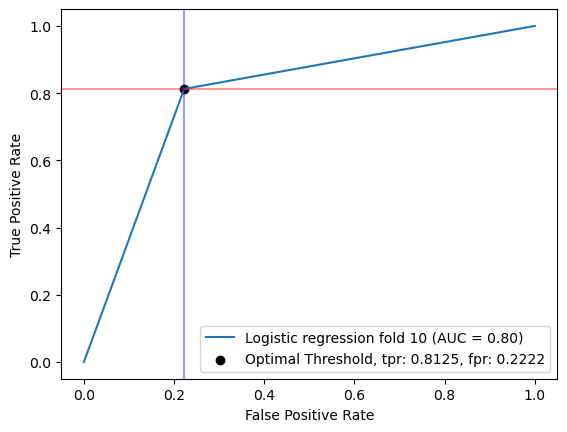

In [6]:
#cross validation

""" for model in scores['estimator']:
    beta_0.append(model.intercept_)
    beta_1.append(model.coef_)
    cnf_matrix = metrics.confusion_matrix(y_test, model.predict(X_test))
    print(cnf_matrix)
print(beta_0) 
print(beta_1) """

sensitivity = []

n_splits = 10
cv = StratifiedKFold(n_splits=n_splits)

for fold, (train, test) in enumerate(cv.split(X, y)):
    logreg_cv = LogisticRegression(C=100, solver='liblinear', random_state=10, penalty='l1')
    logreg_cv.fit(X.iloc[train], y.iloc[train])
    print('beta_0:', logreg_cv.intercept_)
    print('beta_1:', logreg_cv.coef_)
    y_cv_test = y.iloc[test]
    y_cv_pred_test = logreg_cv.predict(X.iloc[test])
    cnf_matrix = metrics.confusion_matrix(y_cv_test, y_cv_pred_test)
    print(cnf_matrix)
    fpr, tpr, thresholds = metrics.roc_curve(y_cv_test, y_cv_pred_test)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic regression fold {:.0f}'.format(fold+1))
    display.plot()
    print('Fold score: {0:0.4f}'. format(metrics.accuracy_score(y_cv_test, y_cv_pred_test)))
    print('sensitivity:', tpr[1])
    sensitivity.append(tpr[1])
    print('specificity:', 1 - fpr[1])
    gmeans = np.sqrt(tpr * (1 - fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label= 'Optimal Threshold, tpr: {:.4f}, fpr: {:.4f}'.format(tpr[ix], fpr[ix]))
    plt.axhline(tpr[ix], color='red', alpha=0.4)
    plt.axvline(fpr[ix], color='blue', alpha=0.4)
    plt.legend()

plt.show()


c:\Users\jeffr\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


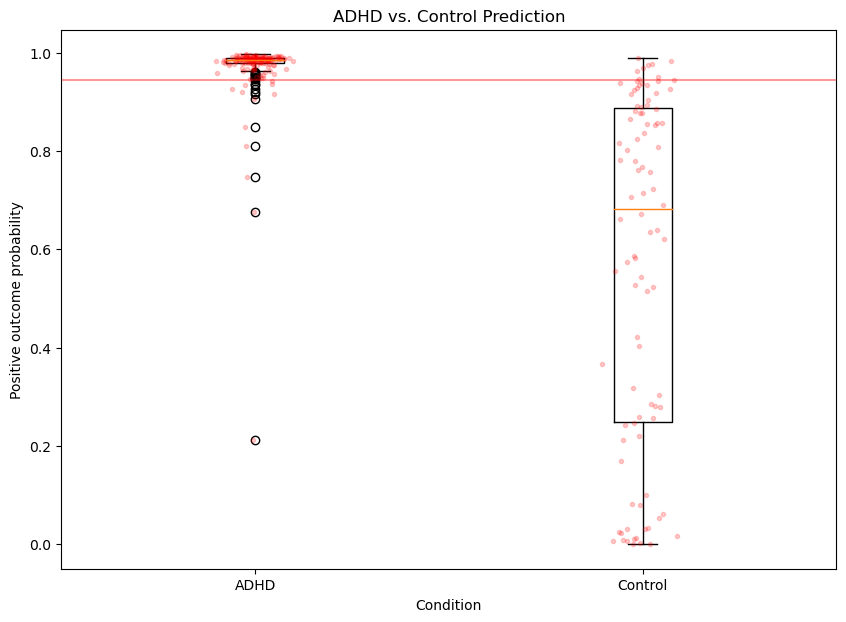

In [7]:
y_hat = logreg.predict_proba(X)
y_hat = y_hat[:, 1]

box_data = [y_hat[:162], y_hat[162:]]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(box_data)
for i in range(2):
    y = box_data[i]
    x = np.random.normal(1+i, 0.04, size=len(y))
    ax.plot(x, y, 'r.', alpha=0.2, label='')

plt.axhline(np.mean(sensitivity), color='red', alpha=0.4)


ax.set_xlabel('Condition')
ax.set_ylabel('Positive outcome probability')
ax.set_xticklabels(['ADHD', 'Control'])
plt.title('ADHD vs. Control Prediction')
plt.show()


In [96]:
false_ADHD = []
false_control = []

for i in range(162):
    if y_hat[i] < np.mean(sensitivity):
        false_ADHD.append(data['Unnamed: 0'][i])
for i in range(94):
    if y_hat[162+i] > np.mean(sensitivity):
        false_control.append(data['Unnamed: 0'][162+i])

print(false_ADHD, "\n", len(false_ADHD))
print(false_control, "\n", len(false_control))

['sub-88024205_ses-3_task-restEO', 'sub-88029557_ses-1_task-restEO', 'sub-88029921_ses-1_task-restEO', 'sub-88038609_ses-1_task-restEC', 'sub-88040853_ses-1_task-restEO', 'sub-88041081_ses-1_task-restEO', 'sub-88049761_ses-1_task-restEO', 'sub-88052645_ses-1_task-restEO', 'sub-88061325_ses-1_task-restEO', 'sub-88061829_ses-1_task-restEO', 'sub-88063217_ses-1_task-restEO', 'sub-88064433_ses-1_task-restEC', 'sub-88073205_ses-1_task-restEC', 'sub-88075101_ses-1_task-restEC', 'sub-88075101_ses-1_task-restEO'] 
 15
['sub-87976413_ses-1_task-restEC', 'sub-87976413_ses-1_task-restEO', 'sub-87976457_ses-1_task-restEC', 'sub-87976641_ses-1_task-restEC', 'sub-88041941_ses-1_task-restEC', 'sub-88053545_ses-1_task-restEC', 'sub-88075053_ses-1_task-restEO'] 
 7
